# VIII. ЗАДАЧА КОШИ ДЛЯ СИСТЕМ ОБЫКНОВЕННЫХ ДИФФЕРЕНЦИАЛЬНЫХ УРАВНЕНИЙ
# 10.5
<font size="5">
    Составить таблицу с шагом h = 0.01 функции $β = β(a)$, которая задана следующим образом:<br>
    $x''(t) = 1 - t^{2} - x^{3}\,\,\, 0 < t < T$<br>
    $x(0) = α;\,\,x'(0) = 0;\,\,\, -1<α<0;\,\,\,β = x(t,α)|_{t=1}$<br>
    

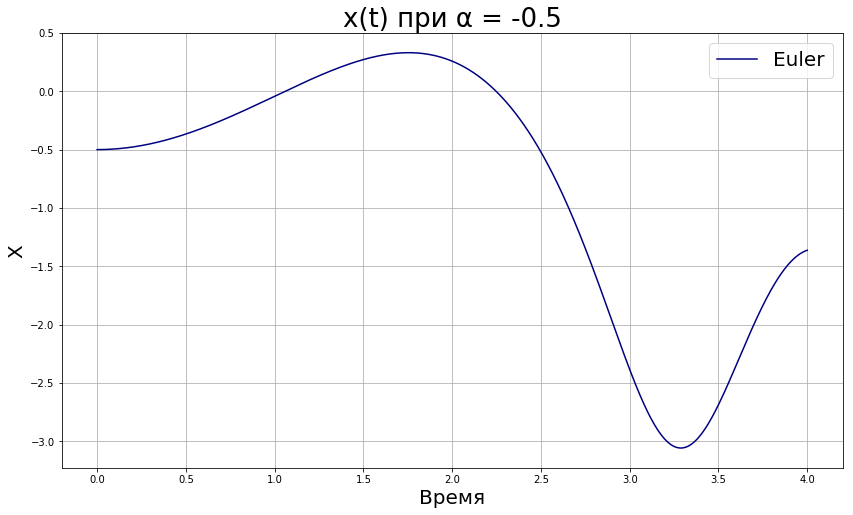

In [2]:
import numpy as np
α = -0.5
x0 = α
v0 = 0

n = 4*10**6
dt = 10**(-6)

Xe = np.zeros(n)
Ve = np.zeros(n)
Ae = np.zeros(n)
Te = np.zeros(n)

Te[0] = 0 
Xe[0] = x0
Ve[0] = v0
Ae[0] = 1 - Te[0]**2 - Xe[0]**3
 

for j in range(0,n-1):
    Te[j+1] = Te[j] + dt
    Ve[j+1] = Ve[j] + Ae[j]*dt
    Xe[j+1] = Xe[j] + Ve[j]*dt
    Ae[j+1] =  1 - Te[j+1]**2 - Xe[j+1]**3
    

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize = (14,8))
ax.plot(Te,Xe,color='navy',label='Euler')
ax.set_title("x(t) при α = "+str(α),fontsize=26)
ax.set_ylabel("X",fontsize=20)
ax.set_xlabel("Время",fontsize=20)
ax.grid()
ax.legend(fontsize=20)

In [1]:
import numpy as np
from matplotlib.widgets import Slider
%matplotlib qt

n = 2*10**4
dt = 2*10**(-4)

α = -0.5
x0 = α
v0 = 0

X = np.zeros(n)
V = np.zeros(n)
A = np.zeros(n)
T = np.zeros(n)
T[0] = 0
X[0] = x0
V[0] = v0
A[0] = 1 - T[0]**2 - X[0]**3


for j in range(n-1):
    T[j+1] = T[j] + dt
    V[j+1] = V[j] + A[j]*dt
    X[j+1] = X[j] + V[j]*dt
    A[j+1] =  1 - T[j+1]**2 - X[j+1]**3

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, figsize = (10,6))
plt.subplots_adjust(left=0.1,bottom=0.2)

p, = ax.plot(T,X,color='navy',label='Euler')
ax.set_ylabel("X",fontsize=16)
ax.set_xlabel("Время",fontsize=16)
ax.grid()
ax.legend(fontsize=20)

ax.set_title("x(t) при α = "+str(round(α,4))+"\nβ = "+str(round(X[10**4],4)),fontsize=20)

axa = plt.axes([0.14,0.09,0.5,0.02])

slider_a = Slider(axa,label='α',valmin=-1,valmax=0,
                  valfmt='%.3f',valinit=α,color='k')


def update_graph(val):
    α = slider_a.val
    x0 = α
    v0 = 0
    
    T[0] = 0
    X[0] = x0
    V[0] = v0
    A[0] = 1 - T[0]**2 - X[0]**3
    
    for j in range(n-1):
        T[j+1] = T[j] + dt
        V[j+1] = V[j] + A[j]*dt
        X[j+1] = X[j] + V[j]*dt
        A[j+1] =  1 - T[j+1]**2 - X[j+1]**3

    p.set_ydata(X)
    ax.set_title("x(t) при α = "+str(round(α,4))+"\nβ = "+str(round(X[10**4],4)),fontsize=20)
    #fig.canvas.draw_idle()

change_a = slider_a.on_changed(update_graph)

plt.show()

<font size="5">
    Найдём зависимость ошибки от шага <br>

In [10]:
#DO NOT RUN THIS CELL!!!!!!!!!!!!!!!!!!!!!!!!!!!!
import numpy as np

α = -0.5
x0 = α
v0 = 0

n = 2*10**7
dt = 10**(-7)

Xe = np.zeros(n)
Ve = np.zeros(n)
Ae = np.zeros(n)
Te = np.zeros(n)

Te[0] = 0 
Xe[0] = x0
Ve[0] = v0
Ae[0] = 1 - Te[0]**2 - Xe[0]**3
 

for j in range(0,n-1):
    Te[j+1] = Te[j] + dt
    Ve[j+1] = Ve[j] + Ae[j]*dt
    Xe[j+1] = Xe[j] + Ve[j]*dt
    Ae[j+1] =  1 - Te[j+1]**2 - Xe[j+1]**3

## Я считаю решение с оочень маленьким шагом "правильным"

#import xlwt
#book = xlwt.Workbook()
#sheet1 = book.add_sheet("Sheet 1")

#sheet1.write(0, 1, dt)
#sheet1.write(0, 0, n)


#for j in range(len(Te)):
#    sheet1.write(j+1, 0, Te[j])
#    sheet1.write(j+1, 1, Xe[j])
    
#book.save("trial.xls")

[5.590887851569804e-07, 1.1356584879163023e-06, 2.288573411168837e-06, 4.59421966131357e-06, 9.205462906503037e-06, 1.8427572533175063e-05, 3.6871193663912116e-05, 7.375527191966214e-05, 0.00014751075249036516, 0.0002949710371691894, 0.0005895027247981299, 0.001177197863766355, 0.0023471231713475538, 0.004665177436689982, 0.009261761277485014]


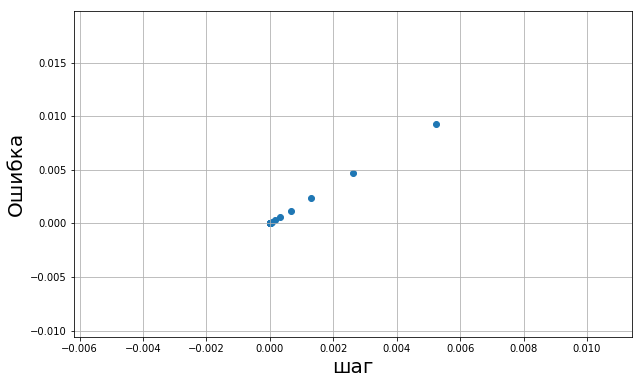

In [11]:
import matplotlib.pyplot as plt


#Зависимость ошибки от шага
δ = []
h = []

for i in range(5,20):
    dt = dt_min*2**(i)
    h.append(dt)
    n = int(n_max*2**(-i))
    
    α = -0.5
    x0 = α
    v0 = 0

    
    Xe = np.zeros(n)
    Ve = np.zeros(n)
    Ae = np.zeros(n)
    Te = np.zeros(n)

    Te[0] = 0 
    Xe[0] = x0
    Ve[0] = v0
    Ae[0] = 1 - Te[0]**2 - Xe[0]**3

    for j in range(0,n-1):
        Te[j+1] = Te[j] + dt
        Ve[j+1] = Ve[j] + Ae[j]*dt
        Xe[j+1] = Xe[j] + Ve[j]*dt
        Ae[j+1] =  1 - Te[j+1]**2 - Xe[j+1]**3

    err = np.zeros(n)
    for j in range(n):
        #print(Te[j])
        #print(T[int(j*2**i)])
        err[j] = abs(Xe[j]-X[int(j*2**i)])
    
    δ.append(max(err))

print(δ)
fig, ax = plt.subplots(1, figsize = (10,6))
ax.scatter(h,δ)
ax.set_ylabel("Ошибка",fontsize=20)
ax.set_xlabel("шаг",fontsize=20)
ax.grid()

<font size="5">
    Как ожидалось для метода Эйлера, ошибка $O(h)$.<br>
    Так как у меня нет аналитического решения, в качестве "правильного решения" для сравнения я взял решение с шагом $ h_{min} = 10^{-7}$<br> 